In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
# đọc dữ  liệu từ excel
data = pd.read_csv('StudentsPerformance.csv')

In [6]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
#đếm số dòng và cột
print('Số hàng: ', data.shape[0])
print('Số cột: ', data.shape[1])

Số hàng:  1000
Số cột:  8


In [8]:
# Thông tin chi tiết trong dữ liệu 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
# Kiểm tra dữ liệu bị thiếu là không chưa giá trị "null"
print('Any missing values ', data.isnull().values.any())

Any missing values  False


In [10]:
# xuất các dữ liệu "not null"
data.notnull().sum()

gender                         1000
race/ethnicity                 1000
parental level of education    1000
lunch                          1000
test preparation course        1000
math score                     1000
reading score                  1000
writing score                  1000
dtype: int64

In [11]:
# thông tin cơ bản về dữ liệu ( data set, min, max, mean, etc)
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


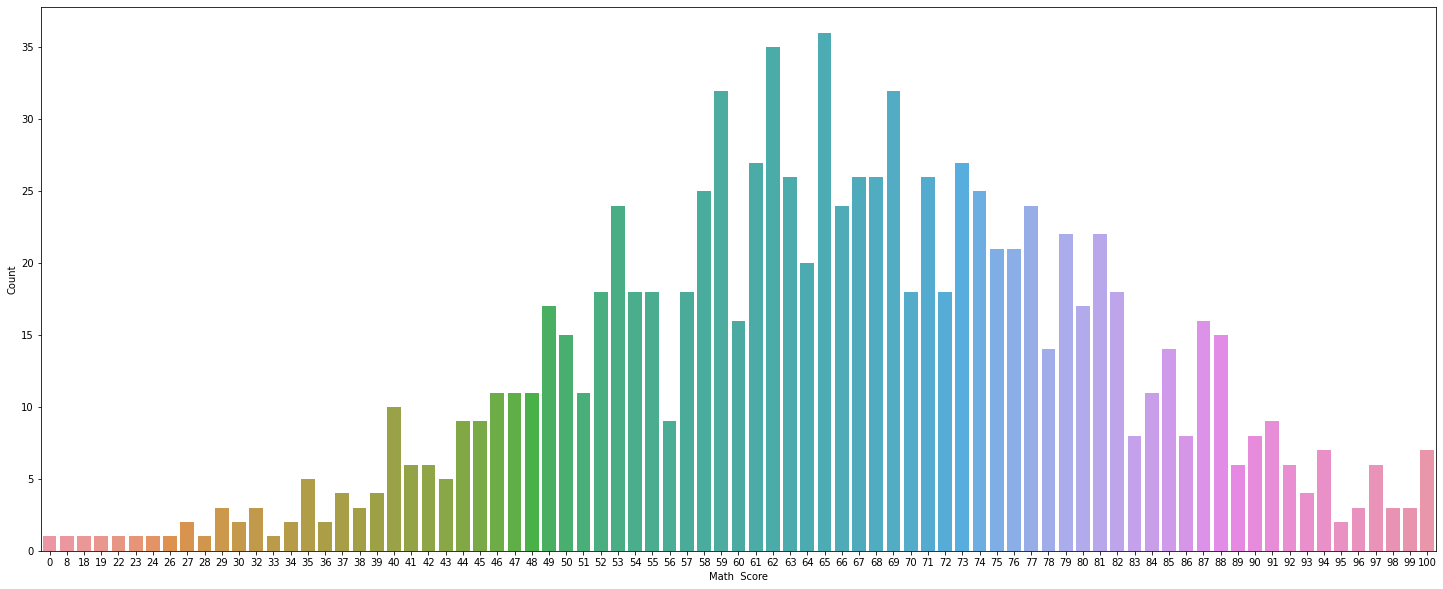

In [12]:
# Explore Math score
plt.figure(figsize=(25,10))
sns.countplot(x = data['math score'])
plt.xlabel('Math  Score')
plt.ylabel('Count')
plt.show()

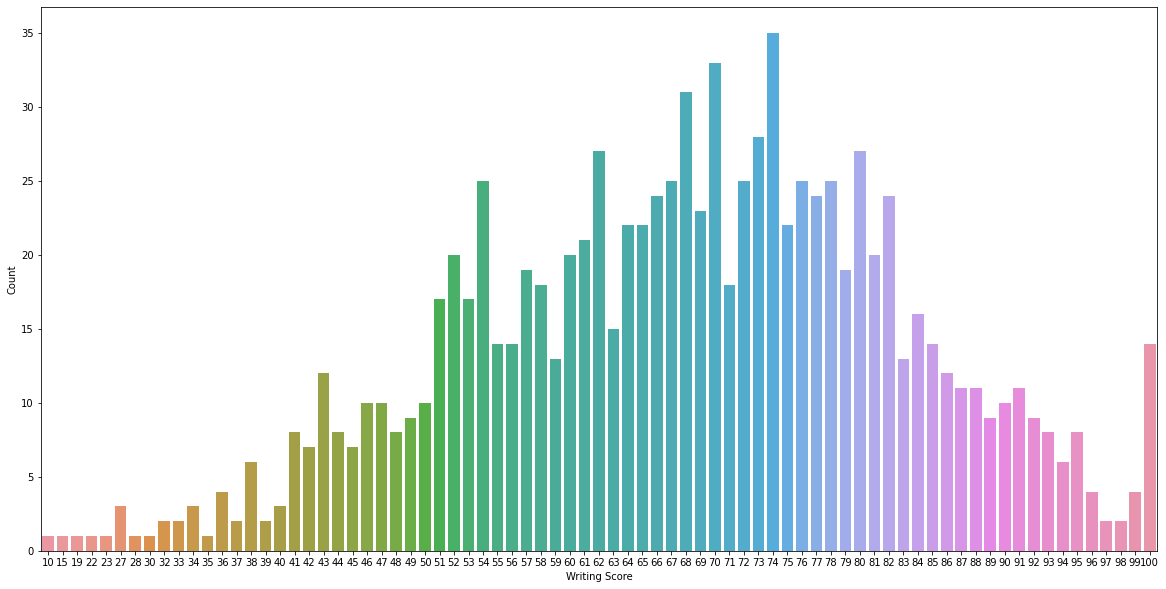

In [13]:
#explore writing score
plt.figure(figsize=(20,10))
sns.countplot(x= data['writing score'])
plt.ylabel('Count')
plt.xlabel('Writing Score')
plt.show()

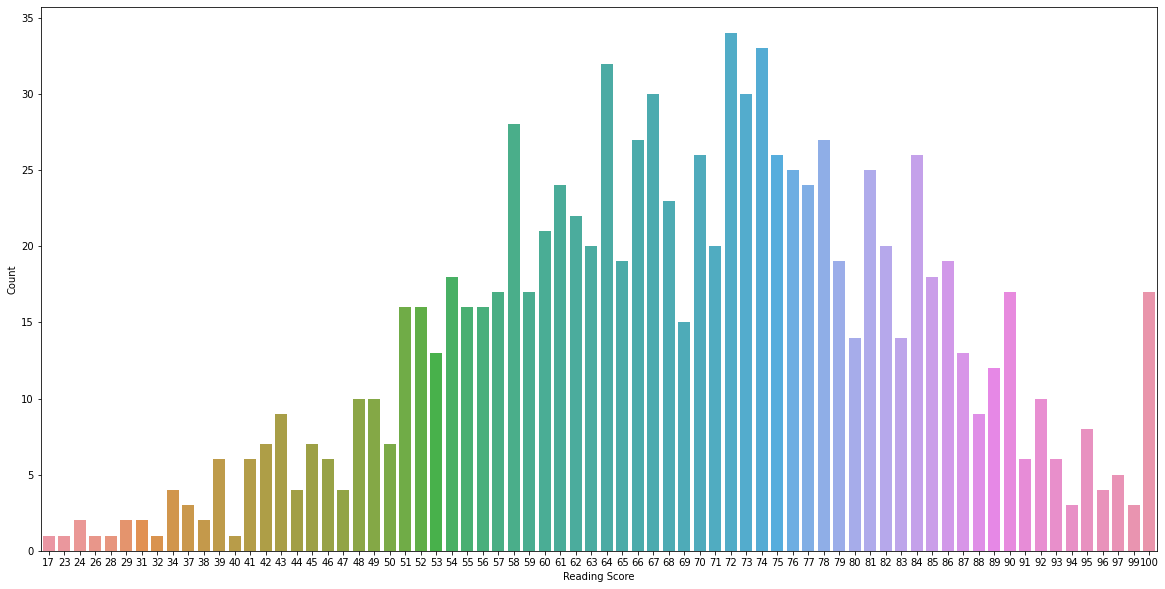

In [14]:
#explore reading score
plt.figure(figsize=(20,10))
sns.countplot(x = data['reading score'])
plt.xlabel('Reading Score')
plt.ylabel('Count')
plt.show()

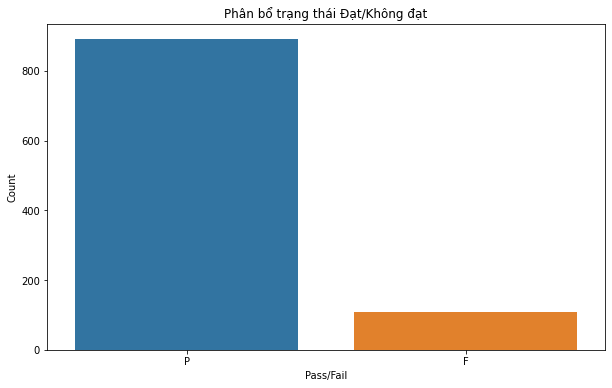

In [15]:
# tổng bảng điểm
data['Total score'] = data['math score'] + data['reading score'] + data['writing score']
data['Total score'] = np.where(data['Total score'] >150 , 'P','F')
plt.figure(figsize=(10,6))
sns.countplot(x=data['Total score'])
plt.xlabel('Pass/Fail')
plt.ylabel('Count')
plt.title('Phân bổ trạng thái Đạt/Không đạt')
plt.show()

In [16]:
# chi tiết
data['Total score'] = data['math score'] + data['reading score'] + data['writing score']
data['Total score'] = np.where(data['Total score']>150, 'P', 'F')
data['Total score'].value_counts()




P    891
F    109
Name: Total score, dtype: int64

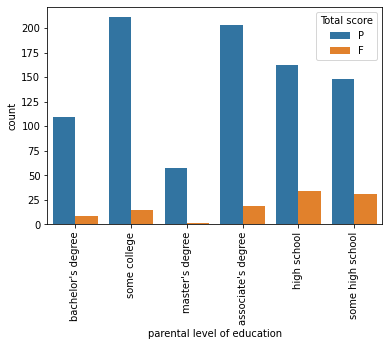

In [17]:
# quan sát mối quan hệ giữa mức độ giáo dục của phụ huynh và khả năng đậu/rớt môn học của học sinh
sns.countplot(x='parental level of education', data = data, hue='Total score')
plt.xticks(rotation=90)
plt.show()

In [18]:
# Từng điểm môn học phải lớn hơn 50 là " Pass" và ngược lại "False"
data['Math_PassStatus'] = data['math score'] 
data['Math_PassStatus'] = np.where(data['math score']>50, 'P', 'F')

data['Reading_PassStatus'] =  data['reading score']
data['Reading_PassStatus'] = np.where(data['reading score']>50, 'P', 'F')

data['Writing_PassStatus'] =  data['writing score']
data['Writing_PassStatus'] = np.where(data['writing score']>50, 'P', 'F')

In [19]:
def conditions(row):
    if row['Math_PassStatus'] == "F" or row['Reading_PassStatus'] == "F" or row['Writing_PassStatus'] == "F":
        val = 'F'
    else:
        val = 'P'
    return val

#áp dụng  một hàm điều kiện vào mỗi điểm dữ liệu trong DataFrame 
data['All_PassStatus']= data.apply(conditions, axis=1)

In [20]:
data.All_PassStatus.value_counts()

P    796
F    204
Name: All_PassStatus, dtype: int64

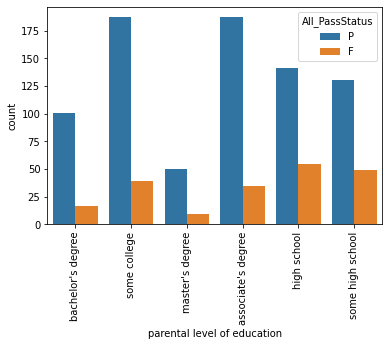

In [21]:
sns.countplot(x='parental level of education', data = data, hue='All_PassStatus')
plt.xticks(rotation=90)
plt.savefig('test3.jpg') ## lưu ảnh thành
plt.show()


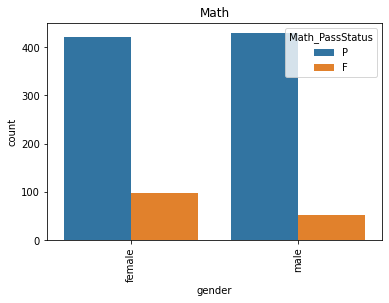

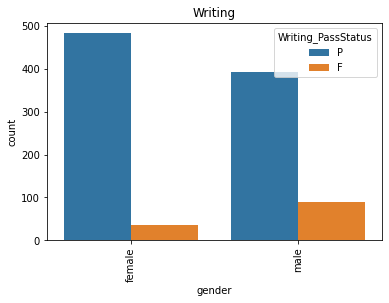

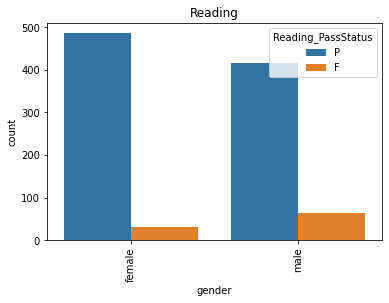

In [22]:
# ảnh hưởng của giới tính đối với Math,Writing,Reading

subjects = ['Math', 'Writing', 'Reading']

# Duyệt qua từng môn học và vẽ biểu đồ countplot tương ứng
for subject in subjects:
    sns.countplot(x='gender', data=data, hue=f'{subject}_PassStatus')
    plt.xticks(rotation=90)
    plt.title(subject)
    plt.show()

In [23]:
# Tính điểm trung bình cộng 
data['Total score'] = data['math score'] + data['reading score'] + data['writing score']
data['Trung bình cộng 3 môn học'] = data['Total score']/3

In [25]:

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,All_PassStatus,Trung bình cộng 3 môn học
0,female,group B,bachelor's degree,standard,none,72,72,74,218,P,P,P,P,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,P,P,P,P,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,P,P,P,P,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,F,P,F,F,49.333333
4,male,group C,some college,standard,none,76,78,75,229,P,P,P,P,76.333333


In [137]:
# hàm output data
#data.to_csv('test.csv')

In [78]:
# Convert Average student makr to A, B, C, D, E, F

In [80]:
# Grading
# above 91 = A Grade
# 81 to 91 = B Grade
# 71 to 81 = C Grade
# 61 to 71 = D Grade
# 51 to 60 = E Grade
# below 51 = F Grade

In [26]:
def GetGrade(x):
    if (x['All_PassStatus'] == 'F'):
        return 'F'    
    if ( x['Trung bình cộng 3 môn học'] > 90 ):
        return 'A'
    if (  x['Trung bình cộng 3 môn học'] > 80):
        return 'B'
    if (  x['Trung bình cộng 3 môn học'] > 70):
        return 'C'
    if (  x['Trung bình cộng 3 môn học'] > 60):
        return 'D'
    if (  x['Trung bình cộng 3 môn học'] > 50):
        return 'E'
    else: 
        return 'F'

data['Grade'] = data.apply(GetGrade, axis=1)

In [27]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total score,Math_PassStatus,Reading_PassStatus,Writing_PassStatus,All_PassStatus,Trung bình cộng 3 môn học,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,P,P,P,P,72.666667,C
1,female,group C,some college,standard,completed,69,90,88,247,P,P,P,P,82.333333,B
2,female,group B,master's degree,standard,none,90,95,93,278,P,P,P,P,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,F,P,F,F,49.333333,F
4,male,group C,some college,standard,none,76,78,75,229,P,P,P,P,76.333333,C


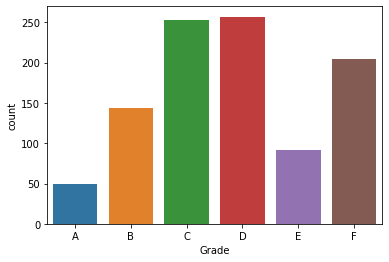

In [28]:
sns.countplot(x='Grade', data=data, order=['A', 'B', 'C', 'D', 'E', 'F'])

# Hiển thị biểu đồ
plt.show()

In [29]:
# tính giá trị trung bình của cột 'Trung bình cộng 3 môn học' trong DataFrame
data['Trung bình cộng 3 môn học'].mean()

67.77066666666666

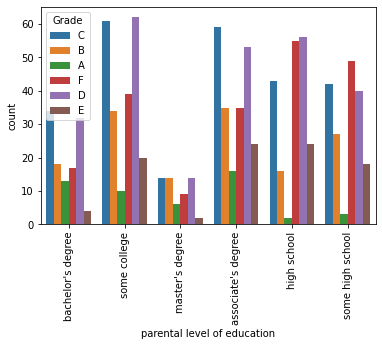

In [30]:
sns.countplot(x='parental level of education', data = data, hue='Grade')
plt.xticks(rotation=90)
plt.show()

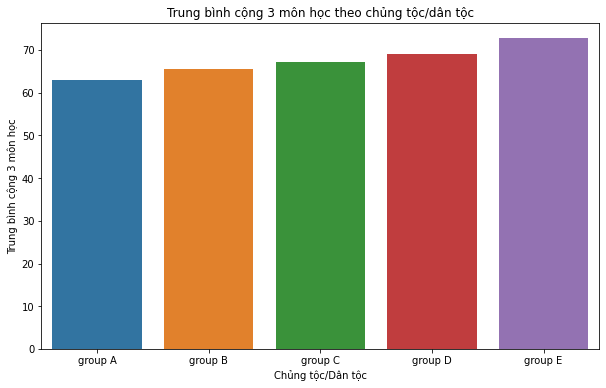

In [42]:

# data.groupby('race/ethnicity').mean('Trung bình cộng 3 môn học')
#Nhóm dữ liệu  cùng giá  trị " group by" và tính giá trị trung bình
grouped_data = data.groupby('race/ethnicity')['Trung bình cộng 3 môn học'].mean().reset_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(x='race/ethnicity', y='Trung bình cộng 3 môn học', data=grouped_data)
plt.title('Trung bình cộng 3 môn học theo chủng tộc/dân tộc')
plt.xlabel('Chủng tộc/Dân tộc')
plt.ylabel('Trung bình cộng 3 môn học')
plt.xticks(rotation=360)
plt.show()

In [ ]:
data